In [ ]:
#https://raw.githubusercontent.com/fintihlupik/NLP-sentimental/refs/heads/master/data/youtoxic_english_1000%20-%20youtoxic_english_1000.csv

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

## Leer el Dataset

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/fintihlupik/NLP-sentimental/refs/heads/master/data/youtoxic_english_1000%20-%20youtoxic_english_1000.csv")

In [ ]:
df.head(10)

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False
5,Ugg9a6FtoXdxmXgCoAEC,04kJtp6pVXI,here people his facebook is https://www.facebo...,True,False,False,False,False,True,False,False,False,False,True,False
6,Ugga9KzkNDGvlXgCoAEC,04kJtp6pVXI,"Check out this you tube post. ""Black man goes ...",True,False,False,False,False,True,True,False,False,False,False,False
7,UggBlIXoph7p-3gCoAEC,04kJtp6pVXI,I would LOVE to see this pussy go to Staten Is...,True,True,False,False,True,True,True,False,False,False,False,False
8,UggD1aYSn7KOR3gCoAEC,04kJtp6pVXI,I agree with the protestor.,False,False,False,False,False,False,False,False,False,False,False,False
9,UggGm8a1fu8brngCoAEC,04kJtp6pVXI,mike browns father was made to say that boooshit,True,True,False,False,True,False,False,False,False,False,False,False


In [ ]:
print('La forma del dataset es', df.shape)
print('Rows duplicadas en el dataset :', df.duplicated().sum() )

La forma del dataset es (1000, 15)
Rows duplicadas en el dataset : 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CommentId        1000 non-null   object
 1   VideoId          1000 non-null   object
 2   Text             1000 non-null   object
 3   IsToxic          1000 non-null   bool  
 4   IsAbusive        1000 non-null   bool  
 5   IsThreat         1000 non-null   bool  
 6   IsProvocative    1000 non-null   bool  
 7   IsObscene        1000 non-null   bool  
 8   IsHatespeech     1000 non-null   bool  
 9   IsRacist         1000 non-null   bool  
 10  IsNationalist    1000 non-null   bool  
 11  IsSexist         1000 non-null   bool  
 12  IsHomophobic     1000 non-null   bool  
 13  IsReligiousHate  1000 non-null   bool  
 14  IsRadicalism     1000 non-null   bool  
dtypes: bool(12), object(3)
memory usage: 35.3+ KB


In [ ]:
df.describe()

,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsReligiousHate
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,13,997,2,2,2,2,2,2,2,2,2,2
top,9pr1oE34bIM,run them over,False,False,False,False,False,False,False,False,False,False
freq,274,3,538,647,979,839,900,862,875,992,999,988


In [ ]:
%%capture
!pip install ydata-profiling
from ydata_profiling import ProfileReport
from IPython.display import HTML # import the HTML object

In [ ]:
profile_change = ProfileReport(df,title="Youtube Comments. Profiling Report", explorative=True,)
profile_change.to_file("output_change.html")
HTML(filename='output_change.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 15/15 [00:00<00:00, 48.58it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Hallazgos:

- No hay missing values.
- Las columnas IsHomophobic y IsRadicalism tienen valor constante de "False"
- El CommentId es un valor único.
- Los comentarios corresponden únicamente a 13 videos de youtube (13 VideoId)
- Las palabras más frecuentes son: and, the, a, to..
- El dataset está bastante balanceado en respecto a IsToxic
- El toxico está altamente relacionado con abusivo.
- IsSexist tiene solo un registro Positivo.
- Hay 997 comentarios diferentes, lo que sugiere que hay comentarios repetidos.



### Vacios y repetidos

In [ ]:
df = df.drop(columns=['CommentId', 'IsHomophobic', 'IsRadicalism'])

Borramos las columnas que no aportan valor

In [ ]:
print("Vacíos:", df[df['Text'].str.strip() == ''].shape[0])

Vacíos: 0


No hay vacios

In [ ]:
num_duplicates = df['Text'].duplicated().sum()
print(f"Número de comentarios duplicados: {num_duplicates}")

Número de comentarios duplicados: 3


In [ ]:
duplicates = df[df['Text'].duplicated(keep=False)]
print(duplicates)

         VideoId           Text  IsToxic  IsAbusive  IsThreat  IsProvocative  \
592  cT14IbTDW2c  RUN THEM OVER     True       True     False           True   
642  cT14IbTDW2c  run them over     True       True      True          False   
657  cT14IbTDW2c  run them over     True       True     False           True   
677  cT14IbTDW2c  run them over     True       True     False           True   
699  cT14IbTDW2c  RUN THEM OVER     True       True     False           True   

     IsObscene  IsHatespeech  IsRacist  IsNationalist  IsSexist  \
592      False         False     False          False     False   
642      False         False     False          False     False   
657      False         False     False          False     False   
677      False         False     False          False     False   
699      False         False     False          False     False   

     IsReligiousHate  comment_length  word_count length_range  
592            False               3           3    

In [ ]:
# Crear una columna temporal con texto en minúsculas para detectar duplicados
df['Text_lower'] = df['Text'].str.lower()

# Buscar duplicados según texto en minúsculas
duplicates_ignore_case = df[df['Text_lower'].duplicated(keep=False)]

print(duplicates_ignore_case)


         VideoId           Text  IsToxic  IsAbusive  IsThreat  IsProvocative  \
578  cT14IbTDW2c  Run them over     True       True     False           True   
592  cT14IbTDW2c  RUN THEM OVER     True       True     False           True   
642  cT14IbTDW2c  run them over     True       True      True          False   
657  cT14IbTDW2c  run them over     True       True     False           True   
677  cT14IbTDW2c  run them over     True       True     False           True   
699  cT14IbTDW2c  RUN THEM OVER     True       True     False           True   

     IsObscene  IsHatespeech  IsRacist  IsNationalist  IsSexist  \
578      False         False     False          False     False   
592      False         False     False          False     False   
642      False         False     False          False     False   
657      False         False     False          False     False   
677      False         False     False          False     False   
699      False         False     Fals

### Distribución de clases (balanceo)

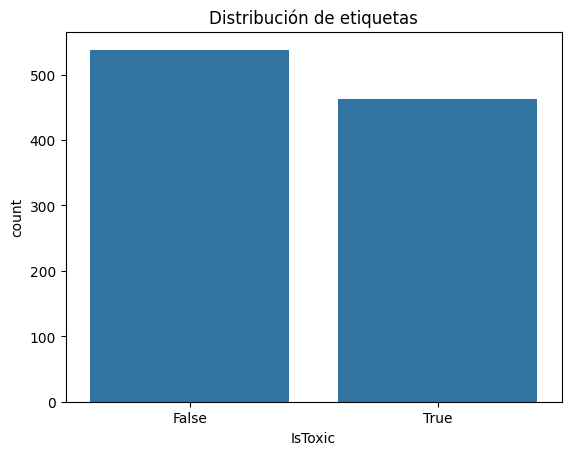

IsToxic
False    0.538
True     0.462
Name: proportion, dtype: float64


In [ ]:
sns.countplot(data=df, x='IsToxic')
plt.title("Distribución de etiquetas")
plt.show()

print(df['IsToxic'].value_counts(normalize=True))


In [ ]:
percentages = df['IsToxic'].value_counts(normalize=True) * 100
percentages = percentages.round(2)
print(percentages)

IsToxic
False    53.8
True     46.2
Name: proportion, dtype: float64


Como vimos anteriormente el dataset está bien balanceado.

## Longitud de comentarios

In [ ]:
df['comment_length'] = df['Text'].apply(lambda x: len(str(x).split()))
print(df['comment_length'].describe())

count    1000.000000
mean       33.776000
std        49.069498
min         1.000000
25%         9.000000
50%        19.000000
75%        39.000000
max       815.000000
Name: comment_length, dtype: float64


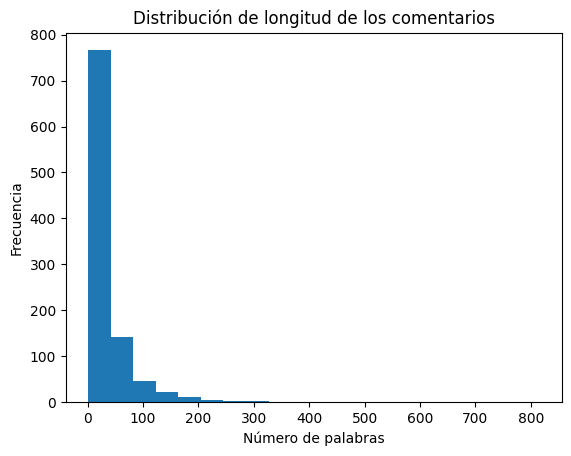

In [ ]:
plt.hist(df['comment_length'], bins=20)
plt.title("Distribución de longitud de los comentarios")
plt.xlabel("Número de palabras")
plt.ylabel("Frecuencia")
plt.show()

## Outliers

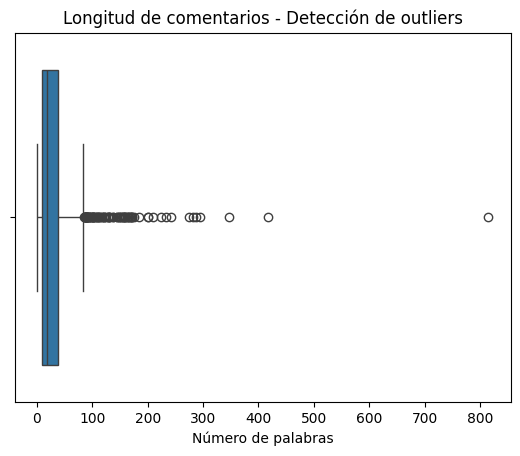

In [ ]:
sns.boxplot(x=df['comment_length'])
plt.title("Longitud de comentarios - Detección de outliers")
plt.xlabel("Número de palabras")
plt.show()

In [ ]:
Q1 = df['comment_length'].quantile(0.25)
Q3 = df['comment_length'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR # (el lower bound da -36, no hay outliers cortos)
upper_bound = Q3 + 1.5 * IQR # (84 - todos mayores a 84 son outliers)

# Comentarios fuera del rango aceptable
outliers = df[(df['comment_length'] < lower_bound) | (df['comment_length'] > upper_bound)]
print(f"Outliers detectados: {len(outliers)} comentarios")

# Porcentaje de outliers
print(f"{100 * len(outliers) / len(df):.2f}% del dataset son outliers de longitud")

Outliers detectados: 86 comentarios
8.60% del dataset son outliers de longitud


### Longitud por clase

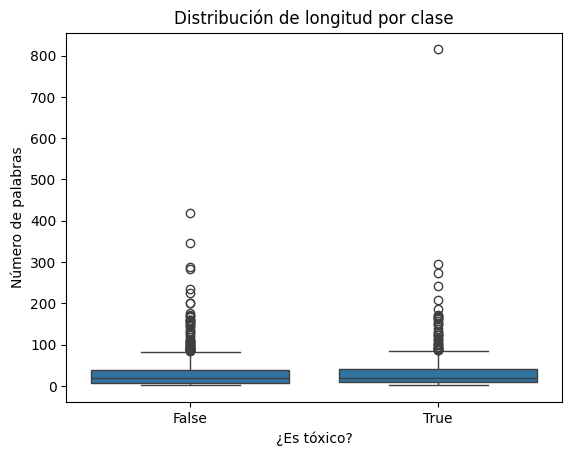

In [ ]:
df['word_count'] = df['Text'].apply(lambda x: len(str(x).split()))
sns.boxplot(x='IsToxic', y='word_count', data=df)
plt.title("Distribución de longitud por clase")
plt.xlabel("¿Es tóxico?")
plt.ylabel("Número de palabras")
plt.show()

Vemos comentarios cortos

In [ ]:
short_comments = df[df['comment_length'] < 3][['Text', 'comment_length', 'IsToxic']].sort_values(by='comment_length')
print(short_comments)

                                         Text  comment_length  IsToxic
105                                    Wow!!!               1    False
433                                       wtf               1    False
908  Darude...............sand...storm.......               1    False
717                            Wow...........               1    False
745                                  Respect!               1    False
691                                    Idiotz               1     True
845                                     GOOD                1    False
965                                  ignorant               1    False
788                                    Bravo!               1    False
837                     #blacklivesdontmatter               1     True
627                                    Idiots               1     True
595                           #alllivesmatter               1    False
243                            Perfect police               2    False
244   

Los comentarios cortos son válidos.

Vemos comentarios largos

In [ ]:
long_comments = df[df['comment_length'] > 150][['Text', 'comment_length', 'IsToxic']].sort_values(by='IsToxic')
print(long_comments)

                                                  Text  comment_length  \
0    If only people would just take a step back and...             287   
927  Look people, black lives do matter just like w...             167   
815  Thank you. Finally, a powerful voice for the t...             347   
565  It’s not that easy to be a cop. “I have a lot ...             224   
553  Here in Finland with a population of over 5 mi...             282   
542  It is always easier to second guess someone. C...             159   
510  I don't think somebody deserves to die because...             160   
492  This guy is a little biased that's for sure , ...             176   
447  There's so much good data here.\n\nI wish it w...             157   
987  I am not black...many years ago I was almost s...             201   
316  Couple things you missed on both sides of the ...             160   
310  The major difference between the Zimmerman cas...             201   
991  What point are you trying to make

Los outliers son comentarios válidos.

/tmp/ipython-input-50-1087640712.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  toxicity_by_length = df.groupby('length_range')['IsToxic'].mean() * 100
/tmp/ipython-input-50-1087640712.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=toxicity_by_length.index, y=toxicity_by_length.values, palette='viridis')


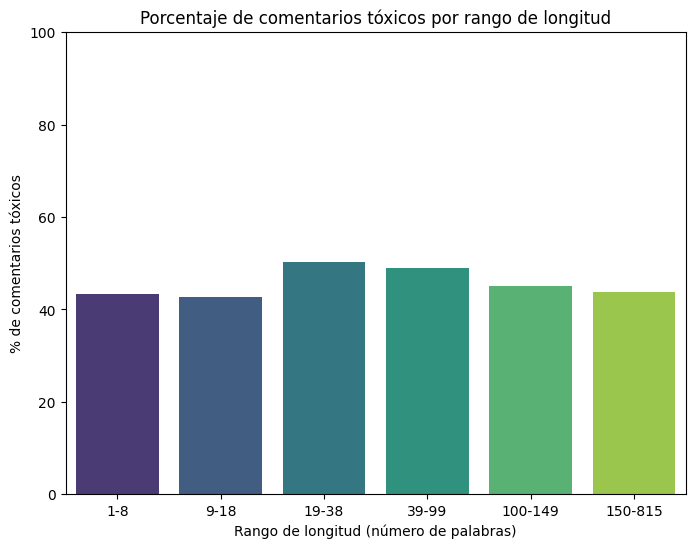

In [ ]:
# Definir los bins para los rangos de longitud
bins = [0, 9, 19, 39, 100, 150, 815]
labels = ['1-8', '9-18', '19-38', '39-99', '100-149', '150-815']

# Crear una nueva columna con el rango de longitud
df['length_range'] = pd.cut(df['comment_length'], bins=bins, labels=labels, right=False)

# Agrupar por rango y calcular porcentaje de tóxicos
toxicity_by_length = df.groupby('length_range')['IsToxic'].mean() * 100

# Crear gráfica de barras
plt.figure(figsize=(8,6))
sns.barplot(x=toxicity_by_length.index, y=toxicity_by_length.values, palette='viridis')

plt.title('Porcentaje de comentarios tóxicos por rango de longitud')
plt.xlabel('Rango de longitud (número de palabras)')
plt.ylabel('% de comentarios tóxicos')
plt.ylim(0, 100)
plt.show()


Como se puede ver la longitud del mensaje no parece ser un fuerte predictor de toxicidad del mensaje.

/tmp/ipython-input-65-964801668.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tag_totals.values, y=tag_totals.index, palette='viridis')


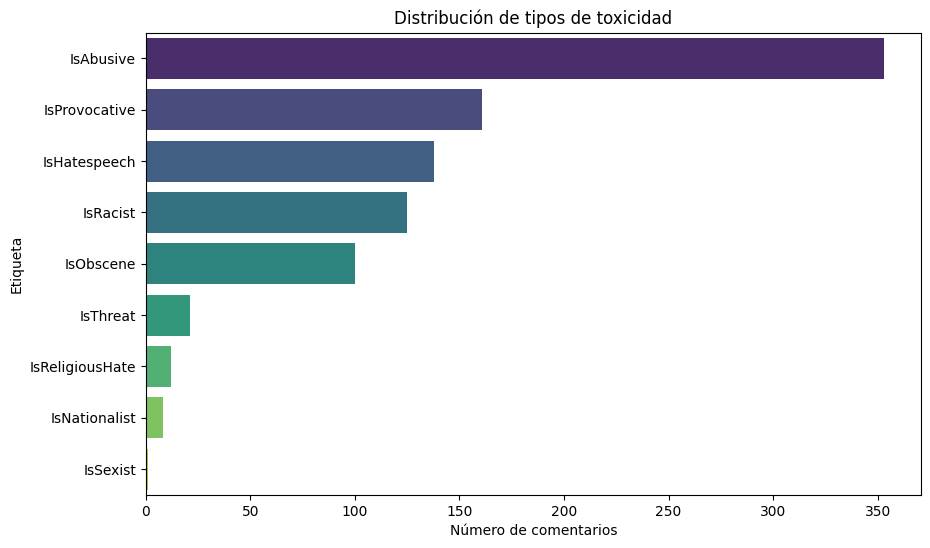

In [ ]:
# Convertimos las columnas booleanas a bool (por si hay categorías)
multi_tags = df.loc[:, 'IsAbusive':'IsReligiousHate'].astype(bool)

tag_totals = multi_tags.sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=tag_totals.values, y=tag_totals.index, palette='viridis')
plt.title("Distribución de tipos de toxicidad")
plt.xlabel("Número de comentarios")
plt.ylabel("Etiqueta")
plt.show()
